In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as px


In [3]:
# read the data
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [20]:

df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [13]:
df.duplicated().value_counts()

,count
False,102058
True,541


## Identified Data Problems

Here are the problems identified within the data:

*   **541 duplicated Records:** There were 541 duplicated records found in the data.
*   **Insufficient Information in `house_rules` and `license`:** These columns have insufficient recorded information.
*   **Formatting Issues in `price` and `service fee`:** Dollar signs and commas are present in the values for `price` and `service fee`.
*   **Missing Currency Information:** The currency for `price` and `service fee` is not explicitly stated in the column titles (assuming USD based on formatting).
*   **Missing Values:** There are missing values in some records across various columns.
*   **Incorrect Data Types:** Columns like `price`, `service fee`, `id`, `host id`, `last review`, and `Construction year` are assigned incorrect data types.
*   **Spelling Error in `neighbourhood group`:** The spelling of 'Brooklyn' was misspelt in some records in the `neighbourhood group` column.
*   **Outliers in `availability 365`:** Some outliers were identified in the `availability 365` column.

## Steps to be Taken for Data Cleaning

Here are the steps we will take to clean the data:

*   Drop duplicated records.
*   Drop house\_rules and license columns with insufficient data.
*   Remove all dollar signs in the price and service fee columns.
*   Remove all commas from the price and service fee columns.
*   Rename the price and service fee columns to include a dollar signs
*   Drop all records with missing values.
*   Change all mismatched data types to the appropriate once.
*   Correct the Spelling of 'brookin' to 'Brooklyn'
*   Get rid of outliers in the 'availability 365' column data.

In [22]:
# Data Cleaning Steps:

# 1. Remove duplicate rows
df_cleaned = df.drop_duplicates().copy() # Good to use .copy() here!
print(f"Step 1: Removed duplicates. We now have {len(df_cleaned)} rows.")

# 2. Get rid of columns with hardly any data
df_cleaned = df_cleaned.drop(['house_rules', 'license'], axis=1)
print("Step 2: Dropped 'house_rules' and 'license' columns.")

# 3. Clean up price and service fee - remove symbols
# Convert to text first in case there are non-string values
df_cleaned['price'] = df_cleaned['price'].astype(str).str.replace('[$,]', '', regex=True)
df_cleaned['service fee'] = df_cleaned['service fee'].astype(str).str.replace('[$,]', '', regex=True)
print("Step 3: Cleaned '$' and ',' from price and service fee.")

# 4. Fix data types for relevant columns
# Turn price and service fee into numbers
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
df_cleaned['service fee'] = pd.to_numeric(df_cleaned['service fee'], errors='coerce')

# Make 'last review' a proper date
df_cleaned['last review'] = pd.to_datetime(df_cleaned['last review'], errors='coerce')

# Make 'Construction year' a whole number (can handle missing values)
df_cleaned['Construction year'] = pd.to_numeric(df_cleaned['Construction year'], errors='coerce').astype('Int64')
print("Step 4: Converted columns to correct data types.")

# 5. Correct spelling mistakes in 'neighbourhood group'
if 'neighbourhood group' in df_cleaned.columns:
    df_cleaned['neighbourhood group'] = df_cleaned['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})
    print("Step 5: Fixed spellings in 'neighbourhood group'.")
else:
    print("Step 5: 'neighbourhood group' column not found, skipping spelling correction.")


# 6. Remove rows that still have any missing values after previous steps
initial_rows = len(df_cleaned)
df_cleaned.dropna(inplace=True)
print(f"Step 6: Removed rows with missing values. We dropped {initial_rows - len(df_cleaned)} rows.")

# 7. Rename price and service fee columns to show currency (assuming USD)
# We'll add '_USD' to the names
if 'price' in df_cleaned.columns:
    df_cleaned = df_cleaned.rename(columns={'price': 'price_USD'})
    print("Step 7a: Renamed 'price' column to 'price_USD'.")
if 'service fee' in df_cleaned.columns:
    df_cleaned = df_cleaned.rename(columns={'service fee': 'service fee_USD'})
    print("Step 7b: Renamed 'service fee' column to 'service fee_USD'.")


# 8. Deal with extreme values (outliers) in 'availability 365'
# Using the IQR method to find typical range
if 'availability 365' in df_cleaned.columns:
    Q1 = df_cleaned['availability 365'].quantile(0.25)
    Q3 = df_cleaned['availability 365'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Option selected: Replace outliers with the boundary values (capping)
    outlier_count = df_cleaned[(df_cleaned['availability 365'] < lower_bound) | (df_cleaned['availability 365'] > upper_bound)].shape[0]
    df_cleaned['availability 365'] = df_cleaned['availability 365'].clip(lower=lower_bound, upper=upper_bound)
    print(f"Step 8: Capped {outlier_count} outliers in 'availability 365'.")

else:
     print("Step 8: 'availability 365' column not found, skipping outlier handling.")


# Show what the cleaned data looks like
display(df_cleaned.info())
display(df_cleaned.head())

Step 1: Removed duplicates. We now have 102058 rows.
Step 2: Dropped 'house_rules' and 'license' columns.
Step 3: Cleaned '$' and ',' from price and service fee.
Step 4: Converted columns to correct data types.
Step 5: Fixed spellings in 'neighbourhood group'.
Step 6: Removed rows with missing values. We dropped 18668 rows.
Step 7a: Renamed 'price' column to 'price_USD'.
Step 7b: Renamed 'service fee' column to 'service fee_USD'.
Step 8: Capped 1 outliers in 'availability 365'.
<class 'pandas.core.frame.DataFrame'>
Index: 83390 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83390 non-null  int64         
 1   NAME                            83390 non-null  object        
 2   host id                         83390 non-null  int64         
 3   host_identity_verified          83390 non-null  object        
 4  

None

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_USD,service fee_USD,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


# **Summary Statistics**

In [24]:
df.describe()


,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


#**What are different Property Types in Dataset?**

In [54]:

property_types = df_cleaned['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44162
Private room,37474
Shared room,1646
Hotel room,108


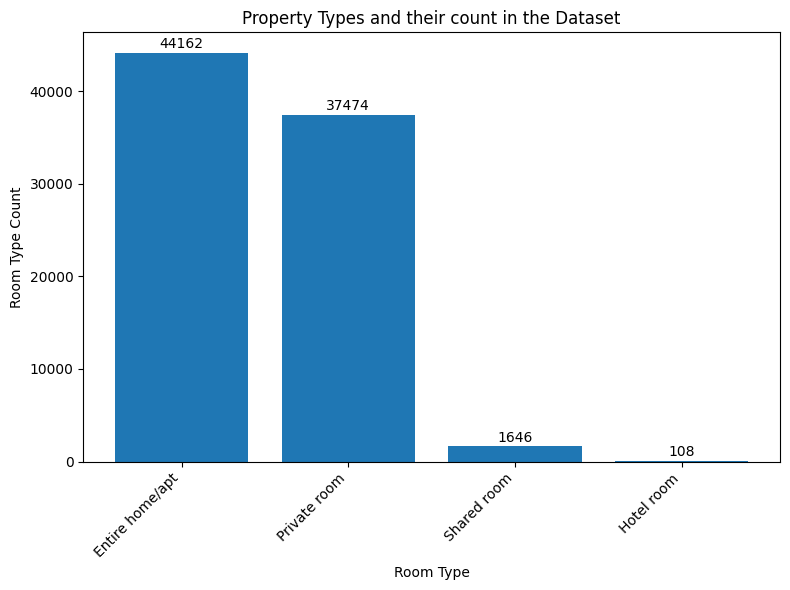

In [55]:
# Count how many of each room type we have in the cleaned data
room_type_counts = df_cleaned['room type'].value_counts().to_frame()

# Create a bar chart
plt.figure(figsize=(8, 6)) # Set the size of the plot
plt.bar(room_type_counts.index, room_type_counts['count'])

# Label the axes and add a title
plt.xlabel("Room Type")
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')

# Show the Numbers on the Bar
# A more universally compatible way is to loop and add text:
for i, count in enumerate(room_type_counts['count']):
    plt.text(i, count + 500, str(count), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The Airbnb open dataset reveals four distinct property or room types. These categories comprise:
*   **Entire home/apt**
*   **Private room**
*   **Shared room**
*   **Hotel room**

Notably, the bar chart illustrates that Entire home/apt dominates the dataset with **44,162** occurrences, followed by Private room with **37,474** occurrences. Shared room and Hotel room trail behind with **1,646** and **108** occurrences, respectively.

# **Which Neighbourhood has the Highest number of Listings?**

In [53]:
hood_group = df_cleaned['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34561
Queens,11124
Bronx,2267
Staten Island,816


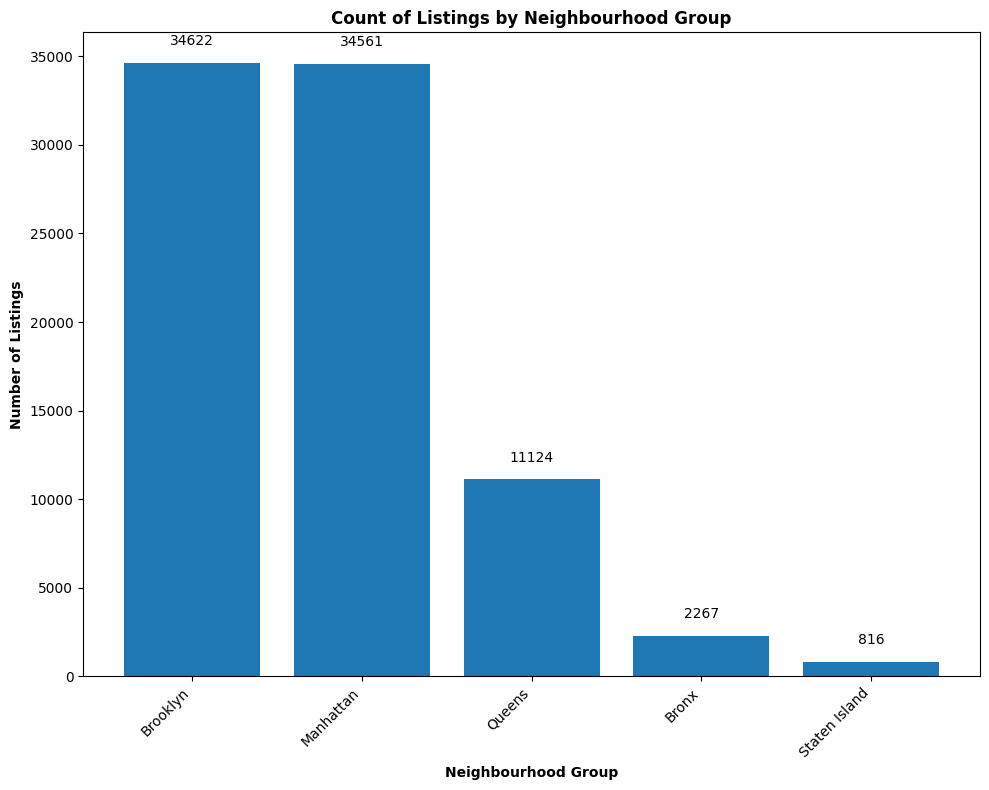

In [58]:
# Plotting the bar chart for neighbourhood group counts
plt.figure(figsize=(10, 8))
plt.bar(hood_group.index, hood_group['count'])

plt.xlabel("Neighbourhood Group", fontweight='bold')
plt.ylabel('Number of Listings', fontweight='bold')
plt.title('Count of Listings by Neighbourhood Group', fontweight='bold')

plt.xticks(rotation=45, ha='right')

# Show the numbers on the bars
for i, count in enumerate(hood_group['count']):
    plt.text(i, count + 1000, str(count), ha='center')

plt.tight_layout()
plt.show()

Based on the bar chart of listings by Neighbourhood Group:

*   The Neighbourhood Groups with the highest number of listings are Brooklyn (**34,622**) and Manhattan (**34,561**), with very similar counts.
*   Queens follows with a significantly lower number of listings (**11,124**).
*   The Bronx and Staten Island have the fewest listings, with **2,267** and **816** respectively.

This indicates that the majority of the Airbnb listings in this dataset are concentrated in Brooklyn and Manhattan.

# **Calculate the average price for each neighbourhood group**

In [64]:
# Calculate the average price for each neighbourhood group
average_price = df_cleaned.groupby('neighbourhood group')['price_USD'].mean().sort_values(ascending=False).to_frame()
average_price

,price_USD
neighbourhood group,
Queens,630.502517
Bronx,630.201147
Brooklyn,627.434261
Manhattan,623.451839
Staten Island,622.132353


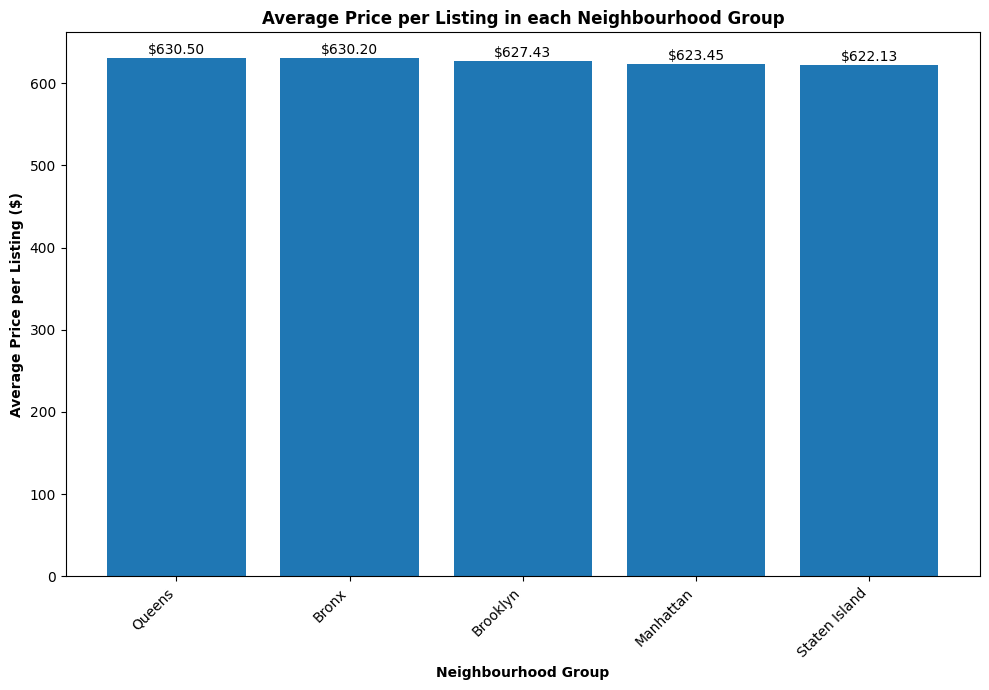

In [68]:
# Plotting the bar chart for average price by neighbourhood group
plt.figure(figsize=(10, 7))

# Using average_price DataFrame
plt.bar(average_price.index, average_price['price_USD'])

# Add labels on top of the bars
for i, price in enumerate(average_price['price_USD']):
    plt.text(i, price + 5, f'${price:.2f}', ha='center')

plt.xlabel("Neighbourhood Group", fontweight='bold')
plt.ylabel('Average Price per Listing ($)', fontweight='bold')
plt.title('Average Price per Listing in each Neighbourhood Group', fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Looking at the bar chart of average prices by Neighbourhood Group, it appears that the average price per listing is relatively consistent across the different areas in this dataset. While there are minor variations, the average price doesn't show a significant difference between Queens, Bronx, Brooklyn, Manhattan, and Staten Island.

## Is there a relationship between the construction year of property and price?

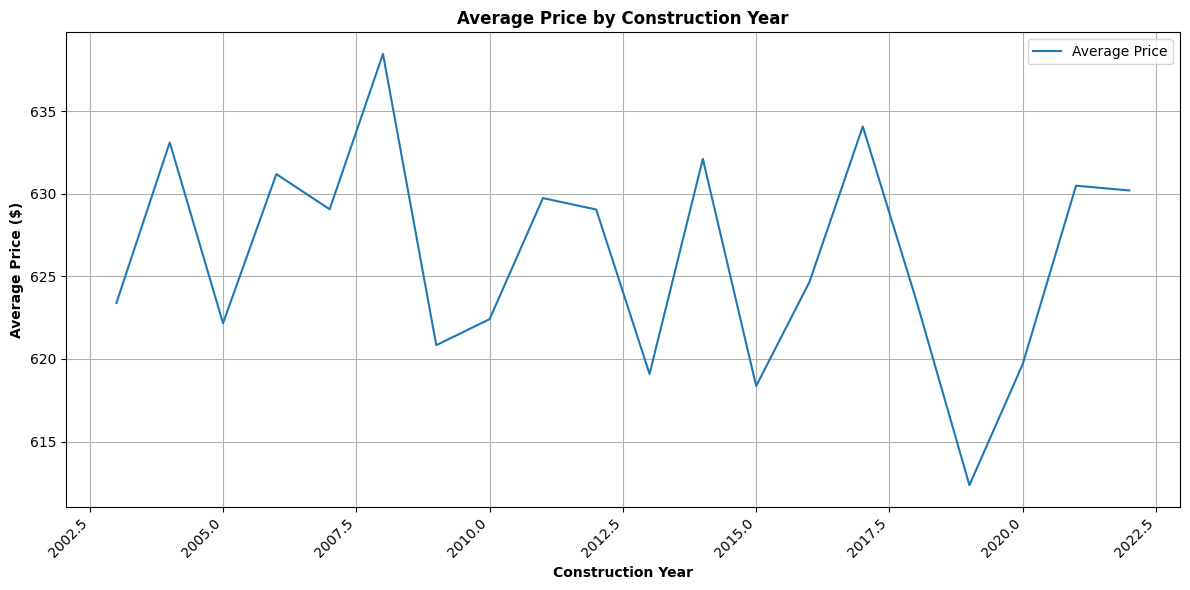

In [72]:
# Calculate the average price for each construction year
average_price_by_year = df_cleaned.groupby('Construction year')['price_USD'].mean().to_frame()

# Plotting the relationship
plt.figure(figsize=(12, 6))
plt.plot(average_price_by_year.index, average_price_by_year['price_USD'], label='Average Price')

# Set labels and title
plt.xlabel("Construction Year", fontweight='bold')
plt.ylabel('Average Price ($)', fontweight='bold')
plt.title('Average Price by Construction Year', fontweight='bold')

plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()
plt.show()

The line plot depicting the relationship between the construction year of properties and the average price per property shows some fluctuations across the years. While there isn't a consistently strong downward trend visible, we can observe variations in the average price depending on the construction year. The plot reveals how the average price changes for properties built in different years within this dataset.

# **Top 10 Hosts by calculated Hosts Listing Count**
From the numerous hosts in the dataset, we will see the 10 hosts with the highest calculated host count.

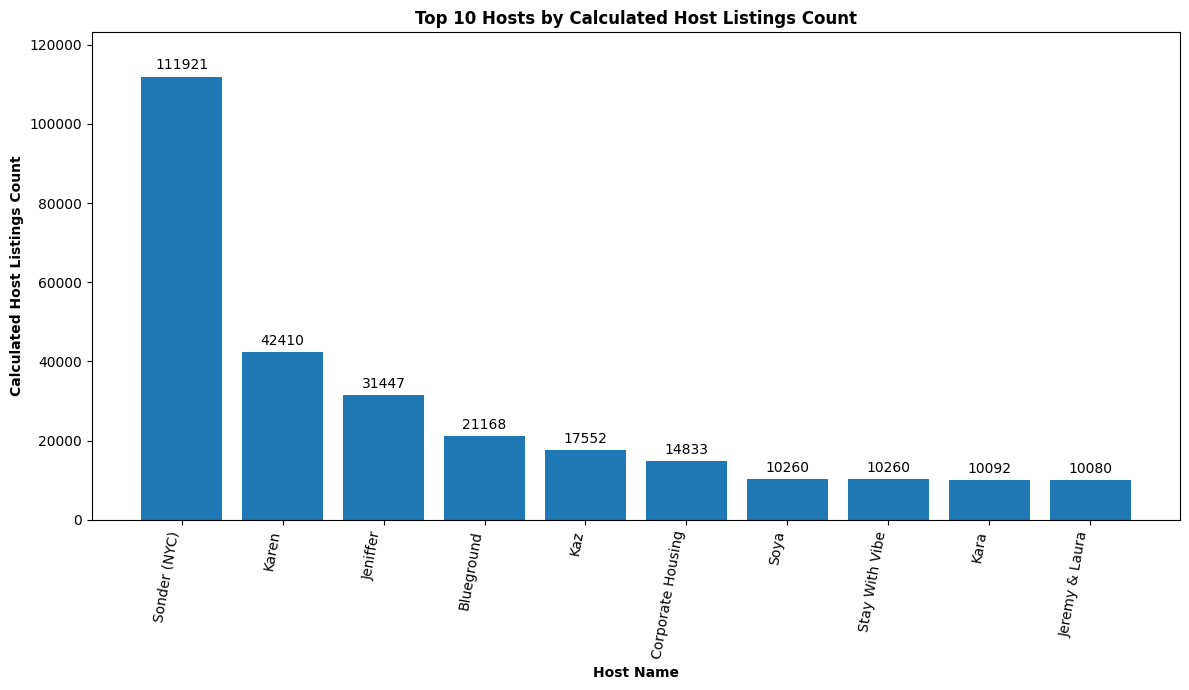

In [83]:
# Find the top 10 hosts by their total calculated listings count
hosts = df_cleaned.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

# Plotting the bar chart for the top 10 hosts
plt.figure(figsize=(12, 7)) # Adjust figure size for better readability

# Create the bar chart
hosts_bar = plt.bar(hosts.index, hosts['calculated host listings count'])

# Add the count labels on top of the bars
plt.bar_label(hosts_bar, labels=[f'{count:.0f}' for count in hosts['calculated host listings count']], label_type='edge', padding=3)


# Set labels and title for the plot
plt.xlabel('Host Name', fontweight='bold')
plt.ylabel('Calculated Host Listings Count', fontweight='bold')
plt.title('Top 10 Hosts by Calculated Host Listings Count', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=80, ha='right')

# Set y-axis limits
plt.ylim(0, hosts['calculated host listings count'].max() * 1.1) # Set limit slightly above max count

plt.tight_layout() # Automatically adjust plot parameters for a tight layout
plt.show()

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with **Sonder (NYC)** notably leading with **111,921** listings.
Subsequently, the other hosts follow in descending order:

*   **Karen** at second position with **42,410** listings
*   **Jeniffer** at third position with **31,447** listings
*   **Blueground** at fourth position with **21,168** listings
*   **Kaz** at fifth position with **17,552** listings
*   **Corporate Housing** at sixth position with **14,833** listings
*   **Soya** at seventh position with **10,260** listings
*   **Stay With Vibe** at eighth position with **10,260** listings
*   **Kara** at ninth position with **10,092** listings
*   and finally **Jeremy & Laura** at tenth position with **10,080** listings.

## **Are hosts with verified identities more likely to receive positive reviews?**

In [85]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df_cleaned.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284107
unconfirmed,3.273325


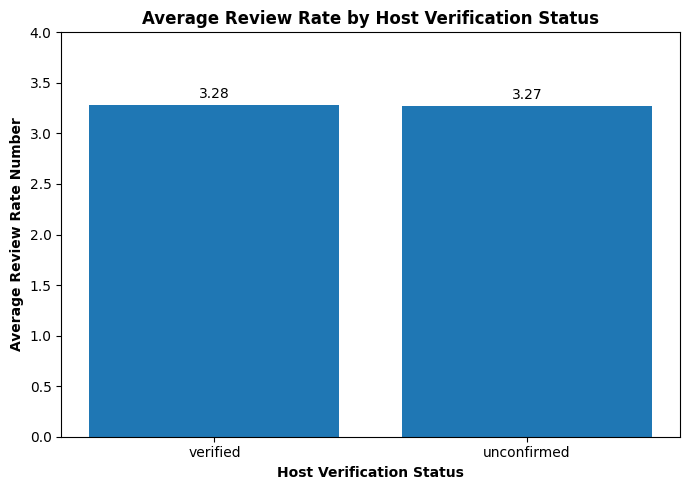

In [88]:
# Plotting the bar graph for average review rate by host verification status
plt.figure(figsize=(7, 5)) # Adjust figure size

review_bar = plt.bar(review.index, review['review rate number'])

# Add labels on top of the bars
plt.bar_label(review_bar, labels=[f'{rate:.2f}' for rate in review['review rate number']], label_type='edge', padding=3)

plt.ylim([0, 4])

plt.xlabel('Host Verification Status', fontweight='bold')
plt.ylabel('Average Review Rate Number', fontweight='bold')
plt.title('Average Review Rate by Host Verification Status', fontweight='bold')

plt.tight_layout() # Adjust layout
plt.show()

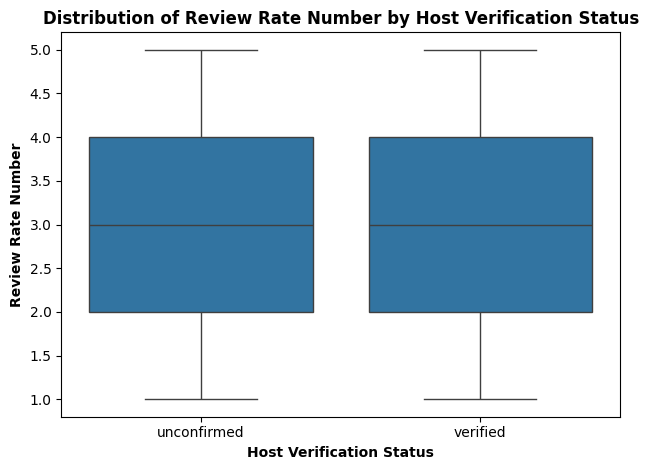

In [90]:
# Set a base color for the plot
base_color = sns.color_palette()[0] # Using the first color from the default palette

# Create a box plot using seaborn
sns.boxplot(data=df_cleaned, x="host_identity_verified", y="review rate number", color=base_color)

# Set labels and title
plt.xlabel("Host Verification Status", fontweight='bold')
plt.ylabel('Review Rate Number', fontweight='bold')
plt.title('Distribution of Review Rate Number by Host Verification Status', fontweight='bold')

plt.tight_layout()
plt.show()

The average review rates for verified and unconfirmed hosts are 3.28 and 3.27, respectively, indicating a marginal difference in their review rates. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

**Is there a correlation between the price of a listing and its service fee?**

In [95]:
# Calculate the correlation between price and service fee
correlation_price_service_fee = df_cleaned['price_USD'].corr(df_cleaned['service fee_USD'])
print(f"Correlation between Price and Service Fee: {correlation_price_service_fee:.6f}")

Correlation between Price and Service Fee: 0.999991


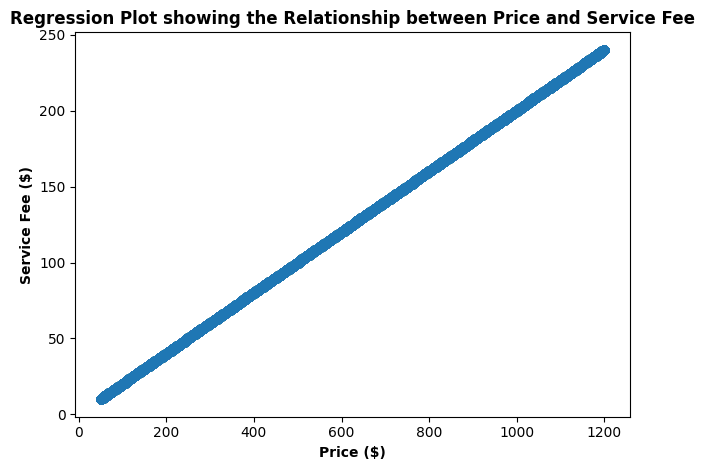

In [96]:
# Create a regression plot using seaborn
sns.regplot(data=df_cleaned, x='price_USD', y='service fee_USD') # Use correct column names from df_cleaned

# Set labels and title with bold fontweight
plt.xlabel('Price ($)', fontweight='bold') # Use correct currency indicator
plt.ylabel('Service Fee ($)', fontweight='bold') # Use correct currency indicator
plt.title('Regression Plot showing the Relationship between Price and Service Fee', fontweight='bold')

plt.tight_layout() # Adjust layout
plt.show()

The Pearson correlation coefficient between the price and service fee is 0.999991, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee. This strong linear relationship suggests that the service fee is directly dependent on the price, likely calculated as a percentage.

# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [101]:
# Calculate the average review rate number grouped by neighbourhood group and room type
ARRN = df_cleaned.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268930
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

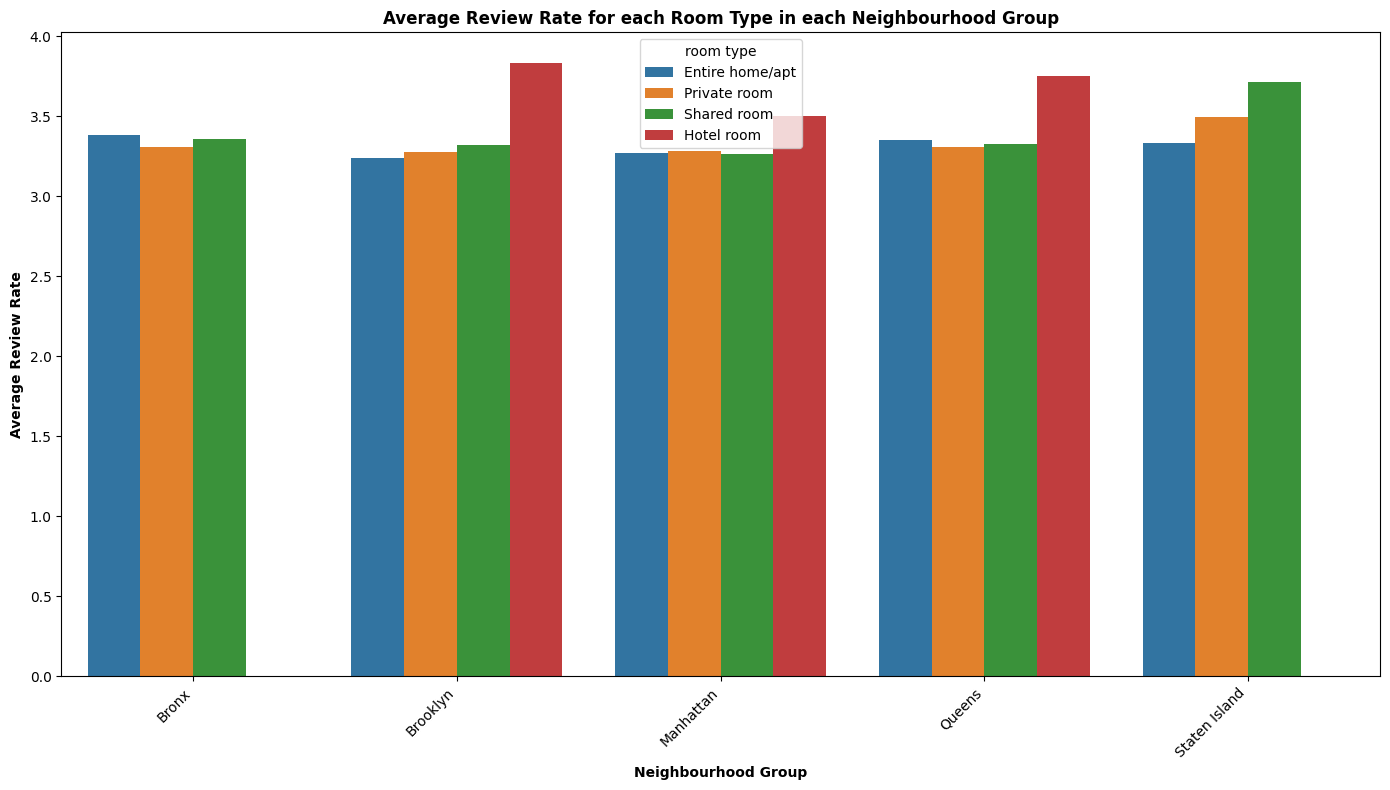

In [103]:
# Calculate the average review rate number grouped by neighbourhood group and room type in a format suitable for seaborn
average_review_rate_grouped = df_cleaned.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().reset_index()

# Plotting the grouped bar chart using seaborn
plt.figure(figsize=(14, 8))

sns.barplot(data=average_review_rate_grouped, x='neighbourhood group', y='review rate number', hue='room type')

# Set labels and title
plt.xlabel('Neighbourhood Group', fontweight='bold')
plt.ylabel('Average Review Rate', fontweight='bold')
plt.title('Average Review Rate for each Room Type in each Neighbourhood Group', fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

This grouped bar chart shows the average review rate for different room types within each neighbourhood group. It allows us to see how review scores vary not only by location but also by the type of accommodation offered. We can observe that some room types consistently have slightly higher or lower average review rates across different areas.

For example, within most neighbourhood groups, "Hotel room" and "Shared room" tend to have slightly higher average review rates compared to "Entire home/apt" and "Private room". Also, "Staten Island" seems to have higher average review rates for "Private room" and "Shared room" compared to other neighbourhood groups.

# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

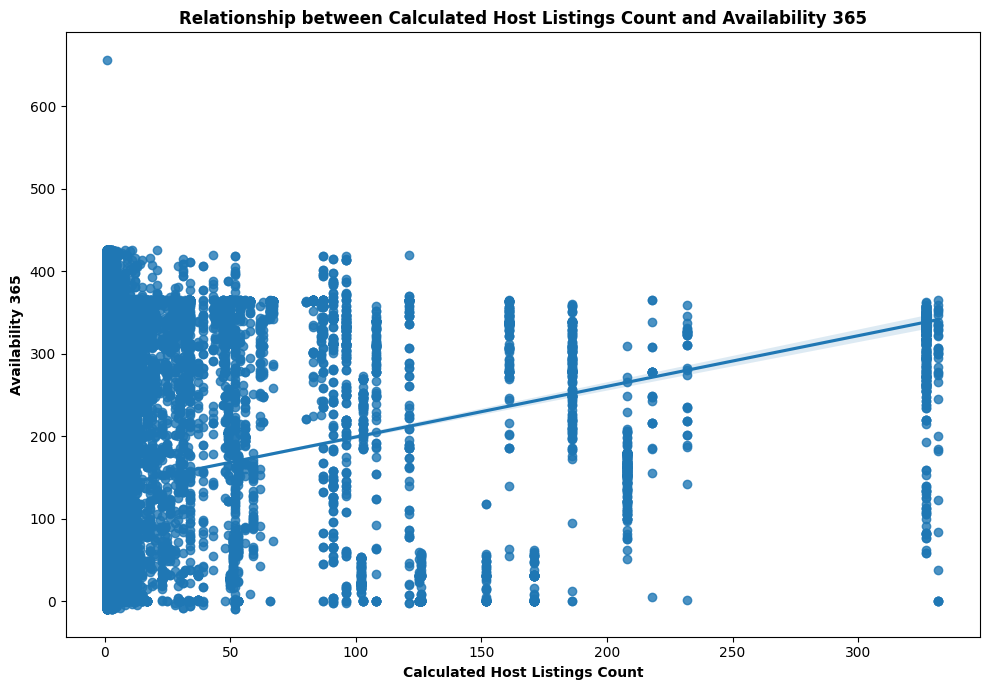

In [105]:
# Create a regression plot using seaborn
plt.figure(figsize=(10, 7)) # Increased figure size
sns.regplot(data=df_cleaned, x='calculated host listings count', y='availability 365')

# Set labels and title with bold fontweight
plt.xlabel('Calculated Host Listings Count', fontweight='bold')
plt.ylabel('Availability 365', fontweight='bold')
plt.title('Relationship between Calculated Host Listings Count and Availability 365', fontweight='bold')

plt.tight_layout() # Adjust layout
plt.show()

In [107]:
# Calculate the correlation between calculated host listings count and availability 365
correlation_listing_availability = df_cleaned['calculated host listings count'].corr(df_cleaned['availability 365'])

print(f"Correlation between Calculated Host Listings Count and Availability 365: {correlation_listing_availability:.2f}")

Correlation between Calculated Host Listings Count and Availability 365: 0.14


The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.14, indicating a weak positive correlation between the two variables.

# Conclusion

Based on the analysis conducted, we were able to find some initial findings related to a few of the topics listed:

*   **Evaluate Pricing Strategies:** We analyzed the average price across different neighbourhood groups and found that the average price is relatively consistent across all areas in this dataset. We also found a very strong positive correlation between the price of a listing and its service fee.

*   **Assess Host Performance:** We identified the top 10 hosts based on their calculated host listings count. We also explored the relationship between host identity verification and average review rates, finding only a marginal difference between verified and unconfirmed hosts. We looked at the weak correlation between calculated host listings count and availability.

However, our analysis did not fully cover all aspects of the topics you listed, such as:

*   **Identify and Analyze Booking Trends:** We did not analyze peak booking seasons, variations by location over time, or average booking lead times as this would require time-series analysis and potentially different data points not fully explored yet.

*   **Understand Guest Preferences:** We did not analyze guest preferences or demographics.

*   **Develop and Utilize Predictive Models:** We did not build any predictive models or conduct segmentation analysis.

*   **Provide Data-Driven Recommendations:** While we gained insights, we did not formulate explicit actionable recommendations for hosts or Airbnb based on a comprehensive analysis covering all listed topics.

Our analysis provided initial insights into the data, particularly regarding data quality, basic distributions, pricing relationships, and some aspects of host activity and review rates. A more in-depth analysis covering all the listed topics would require further exploration and potentially different analytical techniques.